In [1]:
import numpy as np
import torch
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Utilities

The test function that is used for illustrating the workings of the optimisers.

In [2]:
def test_function(x):
    return x[0]**2/15.0+x[1]**2

Utility for plotting the contours of a given function`f` in a range `r` (4-tuple) and 20 levels up to a max level given by `s`. 

In [3]:
def plot_contours(r, s, f):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    delta = 0.01
    X = np.arange(r[0], r[1], delta)
    Y = np.arange(r[2], r[3], delta)
    X,Y = np.meshgrid(X, Y)  
    XX = np.stack((X,Y), axis=0)
    Z=f(XX)
    V=np.arange(0.2,s,s/20)**2
    #CS = plt.contour(X, Y, Z, V, colors=colors)
    #plt.clabel(CS, inline=1, fontsize=10)
    CS = plt.contour(X, Y, Z, V)

Optimisation (i.e. minimisation) of the function `f` starting at `x` (pytorch tensor), by using the given `optimizer` over`nepochs`epochs.  

In [4]:
def optimize(f, x, nepochs, optimizer):
    params = [x,]
    xhist = [x[0].item()]
    yhist = [x[1].item()]
    optimizer.param_groups[0]['params'] = params
    for i in range(nepochs):
        y = f(x)
        optimizer.zero_grad()
        y.backward()
        optimizer.step()
        xhist.append(x[0].item())    
        yhist.append(x[1].item())
    return xhist, yhist

RMS error for measuring the discrepancy to the final target (for the test function above it is (0,0). 

In [5]:
def error(xhist,yhist):
    x,y = xhist[-1], yhist[-1]
    return "%6.3f, (%6.3f, %6.3f)"%(np.sqrt(x**2+y**2),x,y)

### Sample Run

SGD - lr=0.3   1.326, (-1.326, -0.000)


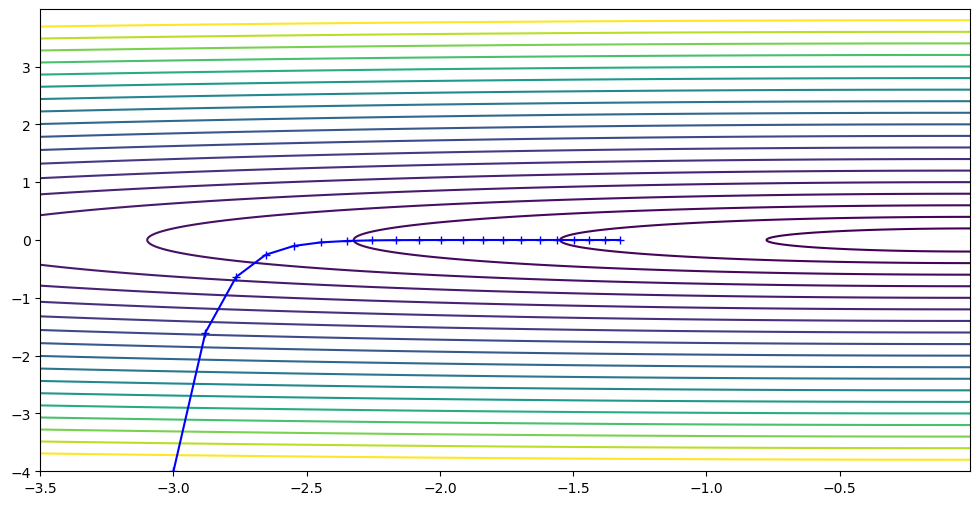

In [6]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

optimizer = torch.optim.SGD([x],lr=.3)
xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

plt.plot(xhist,yhist,"b-+", label="lr=0.3")
print("SGD - lr=0.3 ", error(xhist,yhist))


### Tasks 

For better comparison, always use the same (non-optimal) initial point (-3,-4).

* Study SGD for different learning rates. Illustrate the behavior as learned and analysed in week 02.
* Compare Momentum for different momentum parameters ($\beta_1$) and characterise how the optimisation paths qualitatively change.
* Can you spot a difference with / without Nesterov?
* Compare RMSProp for different parameters $\beta_2$ and characterise how the optimisation paths qualitatively change.
* Finally, check different settings for Adam. Identify your best parameters that allows you to get closest the minimum in 25 epochs and with an error of at max 1.0e-3?


### 1. Different Learning Rates:


In [22]:
colors = ['red', 'orange', 'green', 'blue', 'brown', 'yellow']

SGD - lr=0.1   2.294, (-2.294, -0.046)
SGD - lr=0.001   4.870, (-2.992, -3.843)
SGD - lr=0.5   0.755, (-0.755,  0.000)
SGD - lr=0.8   0.314, (-0.314, -0.000)
SGD - lr=0.9   0.237, (-0.233, -0.046)


Text(0.5, 1.0, 'SGD with different learning rates')

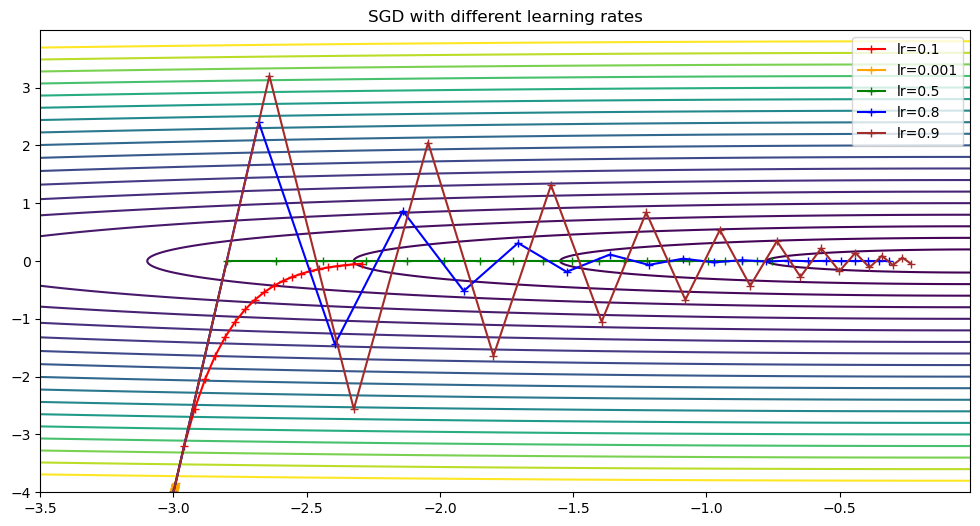

In [18]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

lrs = [0.1, 0.001, 0.5, 0.8, 0.9]
for lr,color in zip(lrs,colors):
  # initial value
  x = torch.tensor([-3.0,-4.0]).requires_grad_()

  optimizer = torch.optim.SGD([x], lr=lr)
  xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

  plt.plot(xhist,yhist, color, marker='+', label=f"lr={lr}")
  print(f"SGD - lr={lr} ", error(xhist,yhist))

plt.legend()
plt.title("SGD with different learning rates")

### 2. Momentum for different momentum parameters with Nesterov


SGD - momentum=0.1   1.209, (-1.209, -0.000)
SGD - momentum=0.001   1.325, (-1.325, -0.000)
SGD - momentum=0.5   0.550, (-0.550,  0.000)
SGD - momentum=0.8   0.229, ( 0.229, -0.000)
SGD - momentum=0.9   0.542, ( 0.542, -0.000)


Text(0.5, 1.0, 'SGD with different Momentums and with Nesterov')

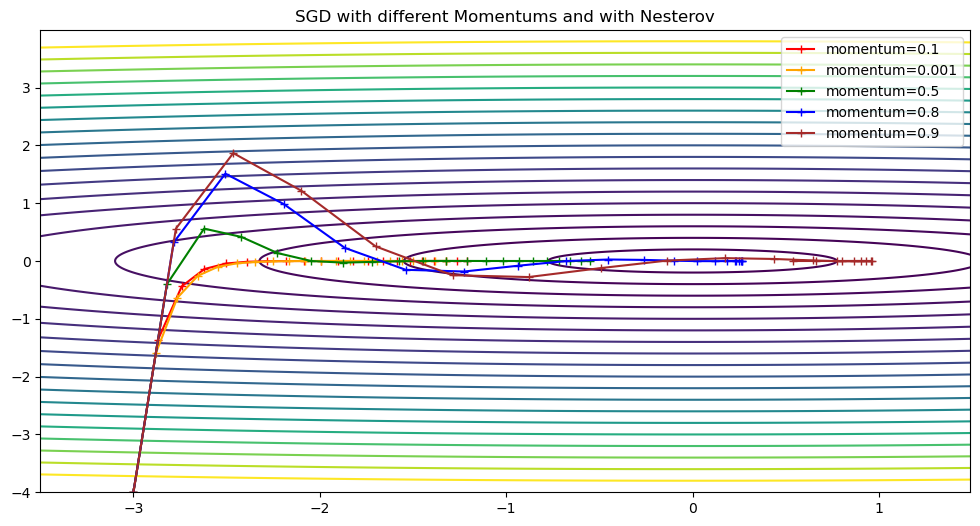

In [54]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,1.5,-4.,4.], 4., test_function)

momentums = [0.1, 0.001, 0.5, 0.8, 0.9]

for momentum,color in zip(momentums,colors):
  # initial value
  x = torch.tensor([-3.0,-4.0]).requires_grad_()

  optimizer = torch.optim.SGD([x], lr=0.3, momentum = momentum, nesterov=True)    # with nesterov
  xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

  plt.plot(xhist,yhist, color, marker='+', label=f"momentum={momentum}")
  print(f"SGD - momentum={momentum} ", error(xhist,yhist))

plt.legend()
plt.title("SGD with different Momentums and with Nesterov")

###  3. Momentum for different momentum parameters without Nesterov

SGD - momentum=0.1   1.209, (-1.209, -0.000)
SGD - momentum=0.001   1.325, (-1.325, -0.000)
SGD - momentum=0.5   0.532, (-0.532, -0.002)
SGD - momentum=0.7   0.009, ( 0.009, -0.003)
SGD - momentum=0.8   0.380, ( 0.360,  0.122)
SGD - momentum=0.9   1.187, ( 0.827,  0.852)


Text(0.5, 1.0, 'SGD with different Momentums and without Nesterov')

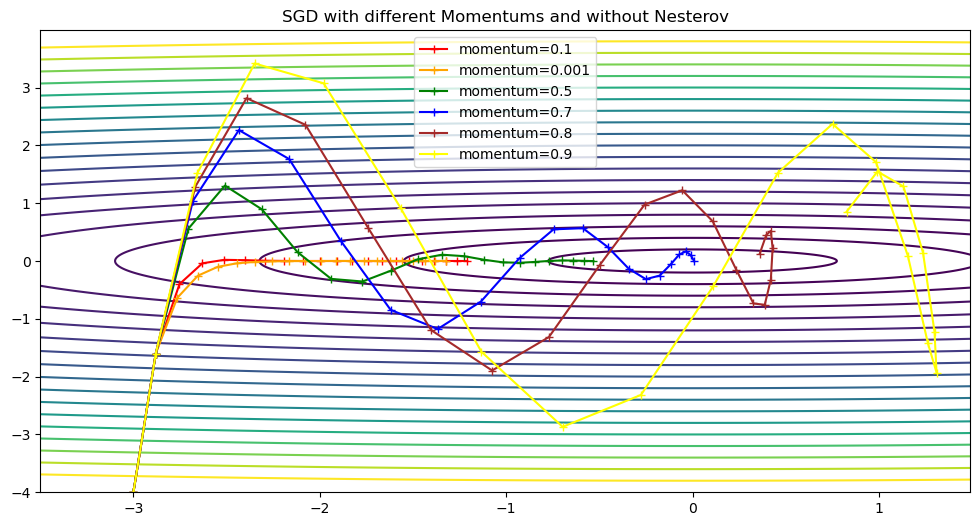

In [53]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,1.5,-4.,4.], 4., test_function)

momentums = [0.1, 0.001, 0.5, 0.7, 0.8, 0.9]

for momentum,color in zip(momentums,colors):
  # initial value
  x = torch.tensor([-3.0,-4.0]).requires_grad_()

  optimizer = torch.optim.SGD([x], lr=0.3, momentum = momentum, nesterov=False)    # with nesterov
  xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

  plt.plot(xhist,yhist, color, marker='+', label=f"momentum={momentum}")
  print(f"SGD - momentum={momentum} ", error(xhist,yhist))

plt.legend()
plt.title("SGD with different Momentums and without Nesterov")

### 3. RMSProp for different parameters $\beta_2$

RMSprop- alpha=0.1, momentum=0.0   0.214, (-0.150,  0.152)
RMSprop- alpha=0.8, momentum=0.0   0.020, (-0.000, -0.020)
RMSprop- alpha=0.7, momentum=0.7   0.030, (-0.027,  0.014)
RMSprop- alpha=0.9, momentum=0.9   1.283, ( 0.643,  1.110)


Text(0.5, 1.0, 'RMSprop with different alphas and momentums')

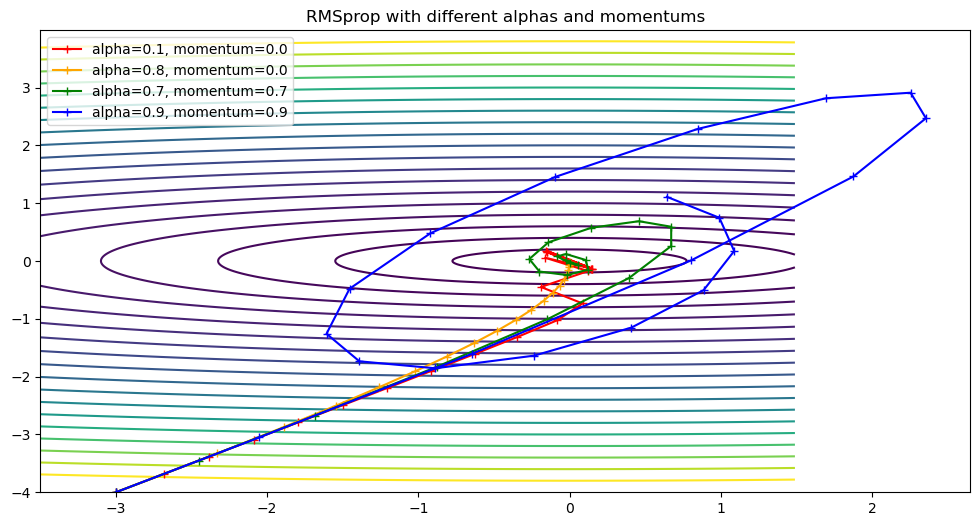

In [51]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,1.5,-4.,4.], 4., test_function)

params = [(0.1,0.0), (0.8,0.0), (0.7,0.7), (0.9,0.9)]

for param,color in zip(params,colors):
  # initial value
  x = torch.tensor([-3.0,-4.0]).requires_grad_()

  optimizer = torch.optim.RMSprop([x], lr=0.3, alpha=param[0], momentum = param[1])    
  xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

  plt.plot(xhist,yhist, color, marker='+', label=f"alpha={param[0]}, momentum={param[1]}")   # alpha is beta2, momentum is beta1
  print(f"RMSprop- alpha={param[0]}, momentum={param[1]} ", error(xhist,yhist))

plt.legend()
plt.title("RMSprop with different alphas and momentums")

### 4. Different settings for Adam

Adam- lr=0.1, momentum=0.8, alpha=0.9   1.792, (-0.723, -1.639)
Adam- lr=0.2, momentum=0.7, alpha=0.8   0.096, ( 0.064,  0.072)
Adam- lr=0.3, momentum=0.6, alpha=0.7   0.023, (-0.023, -0.003)


Text(0.5, 1.0, 'Adam with different parameters')

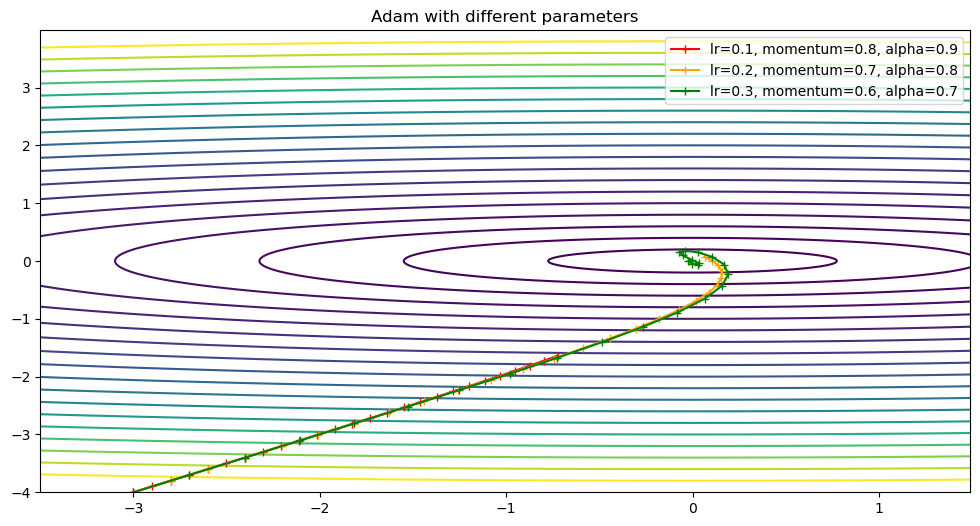

In [52]:
nepochs = 25

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,1.5,-4.,4.], 4., test_function)

params = [(0.1, 0.8, 0.9), (0.2, 0.7, 0.8), (0.3, 0.6, 0.7)]   # (lr, beta1, beta2)

for param,color in zip(params,colors):
  # initial value
  x = torch.tensor([-3.0,-4.0]).requires_grad_()

  optimizer = torch.optim.Adam([x], lr=param[0], betas=(param[1], param[2]))   
  xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

  plt.plot(xhist,yhist, color, marker='+', label=f"lr={param[0]}, momentum={param[1]}, alpha={param[2]}")
  print(f"Adam- lr={param[0]}, momentum={param[1]}, alpha={param[2]} ", error(xhist,yhist))

plt.legend()
plt.title("Adam with different parameters")